In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sys
# change pkg_path variable to the directory storing the package
sys.path.insert(0, '../utility_code')
import fp_dat, fp_viz
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci


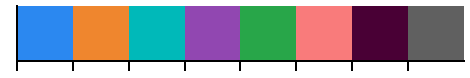

In [3]:
fp_viz.plot_style()
npg_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060']
fp_viz.set_palette(color_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060'], show = True)

# Load Tone Only Data

In [4]:
df_tone_d1 = pd.read_csv(
    './data-clean/LC_GcAMP_Tone_Only_Day1.csv')

df_tone_d2 = pd.read_csv(
    './data-clean/LC_GcAMP_Tone_Only_Day2.csv')

df_tone_d3 = pd.read_csv(
    './data-clean/LC_GcAMP_Tone_Only_Day3.csv')


In [5]:
# label the days and concatenate all days into 1 dataframe for the tone alone group
df_tone_d1['Day'] = 1
df_tone_d2['Day'] = 2
df_tone_d3['Day'] = 3

df_tone_only = pd.concat([df_tone_d1, df_tone_d2, df_tone_d3]).reset_index(drop=True)

# Load TFC Data

In [6]:
df_tfc_d1 = pd.read_csv(
    './data-clean/LC_GcAMP_TFC_Day1.csv')

df_tfc_d2 = pd.read_csv(
    './data-clean/LC_GcAMP_TFC_Day2.csv')

df_tfc_d3 = pd.read_csv(
    './data-clean/LC_GcAMP_TFC_Day3.csv')


In [7]:
# label the days and concatenate all days into 1 dataframe for the tone alone group
df_tfc_d1['Day'] = 1
df_tfc_d2['Day'] = 2
df_tfc_d3['Day'] = 3

df_tfc = pd.concat([df_tfc_d1, df_tfc_d2, df_tfc_d3]).reset_index(drop=True)

In [8]:
# Add a Group column to label whether animals underwent TFC or tone only
df_tfc['Group'] = 'TFC'
df_tone_only['Group'] = 'Tone Only'

In [9]:
# Combine the data into one dataframe
df_all = pd.concat([df_tfc, df_tone_only]).reset_index()

# Looking at Tone Responses by Day and Group

In [10]:
# Get the peak dFF to the tone onset in the tone only group on each day

tone_d1_prepost = fp_dat.calc_pre_post(df_tone_d1, event = 'tone', t_pre=(-2,0), t_post=(0,2), measure = 'max')
tone_d2_prepost = fp_dat.calc_pre_post(df_tone_d2, event = 'tone',  t_pre=(-2,0), t_post=(0,2), measure = 'max')
tone_d3_prepost = fp_dat.calc_pre_post(df_tone_d3, event = 'tone',  t_pre=(-2,0), t_post=(0,2), measure = 'max')

In [11]:
# Get the peak dFF to the tone onset in the TFC group on each day

tfc_d1_prepost = fp_dat.calc_pre_post(df_tfc_d1, event = 'tone',  t_pre=(-2,0), t_post=(0,2), measure = 'max')
tfc_d2_prepost = fp_dat.calc_pre_post(df_tfc_d2, event = 'tone',  t_pre=(-2,0), t_post=(0,2), measure = 'max')
tfc_d3_prepost = fp_dat.calc_pre_post(df_tfc_d3, event = 'tone',  t_pre=(-2,0), t_post=(0,2), measure = 'max')

In [12]:
# combine all days data from tone only into one dataframe
tone_only_prepost = pd.concat([tone_d1_prepost,tone_d2_prepost,tone_d3_prepost]).reset_index(drop = True)

In [13]:
# combine all days data from TFC into one dataframe
tfc_prepost = pd.concat([tfc_d1_prepost,tfc_d2_prepost,tfc_d3_prepost]).reset_index(drop = True)

In [14]:
# add group label to prepost data frame
tone_only_prepost['Group'] = 'Tone Only'
tfc_prepost['Group'] = 'TFC'

In [15]:
# combine tone only and TFC data into one dataframe
all_prepost = pd.concat([tone_only_prepost, tfc_prepost]).reset_index()

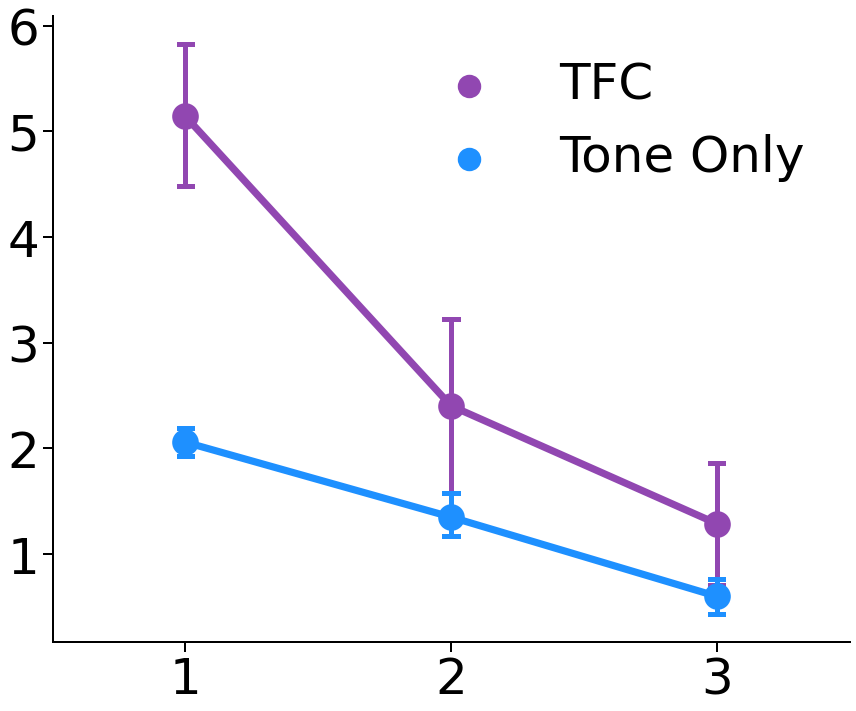

In [16]:
# Plot peak dFF of tone only and TFC groups on each day
pal = ['#9147B1','dodgerblue']
fig, ax = plt.subplots(figsize = (12,10))

p = sns.pointplot(x = 'Day', y = '465nm_dFF_norm', hue = 'Group', 
                ci = 68, hue_order=['TFC','Tone Only'], palette = pal, capsize=0.05, 
                  data=all_prepost.query('epoch == "post-tone"'), 
                  errwidth=5, scale=2,  marker_size=800)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(['1','2','3'], fontsize = 50)

plt.yticks(fontsize = 50)


leg = plt.legend(loc = "upper right", fontsize = 50)
leg.get_texts()[0].set_text('TFC')
leg.get_texts()[1].set_text('Tone Only')

plt.setp(ax.collections, sizes=[450])

#ax.set_ylim(0,6.99)

plt.tight_layout()

In [17]:
# Separate out the pre and post tone data
all_post = all_prepost.query('epoch == "post-tone"')
all_pre = all_prepost.query('epoch == "pre-tone"')

In [18]:
# Just get the needed columns
all_post = all_post[['Animal', '465nm_dFF_norm', 'Day', 'Group']]
all_pre = all_pre[['Animal', '465nm_dFF_norm', 'Day', 'Group']]

In [19]:
# Rename data column for easier typing
new_columns = all_post.columns.values
new_columns[1] = 'Post'
all_post.columns = new_columns

In [20]:
# Rename data column for easier typing
new_columns = all_pre.columns.values
new_columns[1] = 'Pre'
all_pre.columns = new_columns

In [21]:
import pingouin as pg

In [22]:
# Run mixed RM ANOVA with day as within subjects factor and group as between subjects
# to determine whether there is an effect of day, group, or interaction on tone response dFF
pg.mixed_anova(data = all_post, dv = 'Post', within = 'Day', between='Group', subject='Animal').round(3)

/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,17.229,1,7,17.229,8.372,0.023,NaN,0.545,NaN,NaN,NaN,NaN
1,Day,29.372,2,14,14.686,25.609,0.000,0.003,0.785,0.559,False,0.212,0.004
2,Interaction,7.398,2,14,3.699,6.451,0.010,NaN,0.480,NaN,NaN,NaN,NaN


In [23]:
# Pairwise 

pg.pairwise_ttests(data=all_post, dv='Post', between='Group', within='Day', subject='Animal', 
                   padjust='bonf') 

,Contrast,Day,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Day,-,1.0,2.0,True,True,2.896405,8.000000,two-sided,0.020002,0.060005,bonf,3.685,0.958921
1,Day,-,1.0,3.0,True,True,4.535440,8.000000,two-sided,0.001911,0.005732,bonf,24.169,1.611877
2,Day,-,2.0,3.0,True,True,5.882426,8.000000,two-sided,0.000369,0.001107,bonf,94.062,0.827574
3,Group,-,TFC,Tone Only,False,True,2.576519,3.263044,two-sided,0.075372,NaN,NaN,2.269,1.725303
4,Day * Group,1.0,TFC,Tone Only,False,True,3.737159,3.198509,two-sided,0.029920,0.089761,bonf,6.418,2.510583
5,Day * Group,2.0,TFC,Tone Only,False,True,1.241612,3.493534,two-sided,0.291216,0.873648,bonf,0.786,0.822448
6,Day * Group,3.0,TFC,Tone Only,False,True,1.088444,3.508771,two-sided,0.345448,1.000000,bonf,0.715,0.720497


# Looking at Tone Termination Responses by Day and Group

In [24]:
# Get the peak dFF to the tone onset in the tone only group on each day

tone_d1_prepost = fp_dat.calc_pre_post(df_tone_d1, event = 'tone', t_pre=(18,20), t_post=(20,22), measure = 'max')
tone_d2_prepost = fp_dat.calc_pre_post(df_tone_d2, event = 'tone',  t_pre=(18,20), t_post=(20,22), measure = 'max')
tone_d3_prepost = fp_dat.calc_pre_post(df_tone_d3, event = 'tone',  t_pre=(18,20), t_post=(20,22), measure = 'max')

In [25]:
# Get the peak dFF to the tone onset in the TFC group on each day

tfc_d1_prepost = fp_dat.calc_pre_post(df_tfc_d1, event = 'tone',  t_pre=(18,20), t_post=(20,22), measure = 'max')
tfc_d2_prepost = fp_dat.calc_pre_post(df_tfc_d2, event = 'tone',  t_pre=(18,20), t_post=(20,22), measure = 'max')
tfc_d3_prepost = fp_dat.calc_pre_post(df_tfc_d3, event = 'tone',  t_pre=(18,20), t_post=(20,22), measure = 'max')

In [26]:
# combine all days data from tone only into one dataframe
tone_only_prepost = pd.concat([tone_d1_prepost,tone_d2_prepost,tone_d3_prepost]).reset_index(drop = True)

In [27]:
# combine all days data from TFC into one dataframe
tfc_prepost = pd.concat([tfc_d1_prepost,tfc_d2_prepost,tfc_d3_prepost]).reset_index(drop = True)

In [28]:
# add group label to prepost data frame
tone_only_prepost['Group'] = 'Tone Only'
tfc_prepost['Group'] = 'TFC'

In [29]:
# combine tone only and TFC data into one dataframe
all_prepost = pd.concat([tone_only_prepost, tfc_prepost]).reset_index()

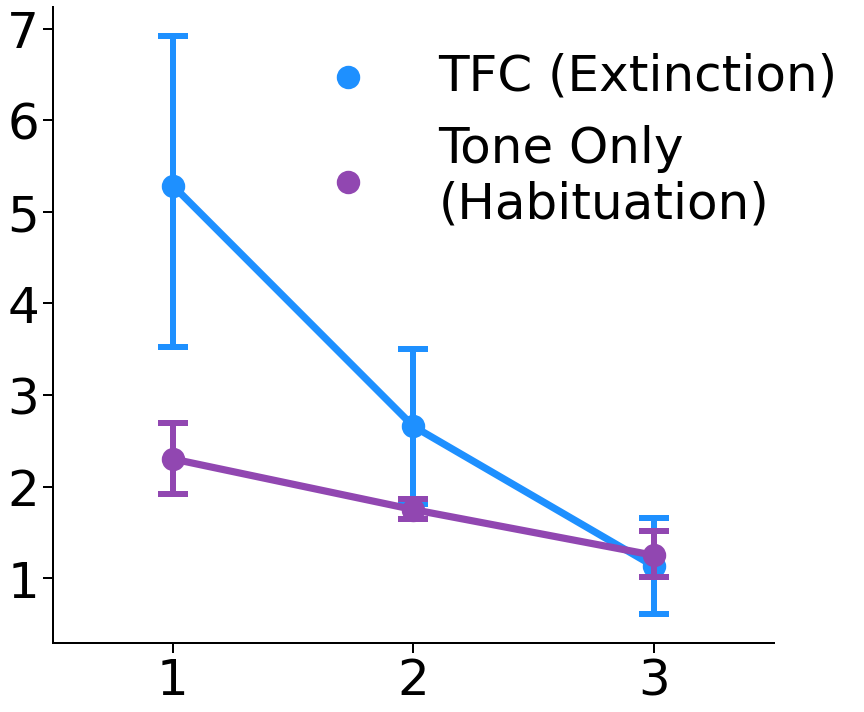

In [30]:
# Plot peak dFF of tone only and TFC groups on each day
pal = ['dodgerblue', '#9147B1']
fig, ax = plt.subplots(figsize = (12,10))

p = sns.pointplot(x = 'Day', y = '465nm_dFF_norm', hue = 'Group', 
                ci = 68, hue_order=['TFC','Tone Only'], palette = pal, capsize=0.1, 
                data = all_prepost.query('epoch == "post-tone"'),  errwidth = 6, scale = 2)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(['1','2','3'], fontsize = 50)

plt.yticks(fontsize = 50)


leg = plt.legend(loc = "upper right", bbox_to_anchor = (1.15, 1), fontsize = 50)
leg.get_texts()[0].set_text('TFC (Extinction)')
leg.get_texts()[1].set_text('Tone Only\n(Habituation)')

#ax.set_ylim(0,6.99)

plt.tight_layout()

In [31]:
# Separate out the pre and post tone data
all_post = all_prepost.query('epoch == "post-tone"')
all_pre = all_prepost.query('epoch == "pre-tone"')

In [32]:
# Just get the needed columns
all_post = all_post[['Animal', '465nm_dFF_norm', 'Day', 'Group']]
all_pre = all_pre[['Animal', '465nm_dFF_norm', 'Day', 'Group']]

In [33]:
# Rename data column for easier typing
new_columns = all_post.columns.values
new_columns[1] = 'Post'
all_post.columns = new_columns

In [34]:
# Rename data column for easier typing
new_columns = all_pre.columns.values
new_columns[1] = 'Pre'
all_pre.columns = new_columns

In [35]:
import pingouin as pg

In [36]:
# Run mixed RM ANOVA with day as within subjects factor and group as between subjects
# to determine whether there is an effect of day, group, or interaction on tone response dFF
pg.mixed_anova(data = all_post, dv = 'Post', within = 'Day', between='Group', subject='Animal').round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,10.556,1,7,10.556,1.618,0.244,NaN,0.188,NaN,NaN,NaN,NaN
1,Day,27.019,2,14,13.509,13.431,0.001,0.017,0.657,0.525,False,0.096,0.0
2,Interaction,11.114,2,14,5.557,5.525,0.017,NaN,0.441,NaN,NaN,NaN,NaN
